<a href="https://colab.research.google.com/github/Mohammed-Baig/Image-Stitching/blob/master/edge_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and import libraries and packages

In [ ]:
!pip install kornia

In [ ]:
import torch
import kornia
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

Initialize the function for Q1 Part 1


In [ ]:
def MyCanny(bw_image, standard_deviation, gradient_magnitude_threshold):

  #Apply a Gaussian blur to the image
  gaussian_blurred_image = kornia.filters.gaussian_blur2d(bw_image, (3, 3), (standard_deviation, standard_deviation))

  #Get the Sobel filter vectors for the X and Y planes
  sobel_x = torch.FloatTensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]]).unsqueeze(0).unsqueeze(0)
  sobel_y = torch.FloatTensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]).unsqueeze(0).unsqueeze(0)

  #Calculate the derivatives of the filters across the X and Y planes
  gradient_x = torch.nn.functional.conv2d(gaussian_blurred_image, sobel_x)
  gradient_y = torch.nn.functional.conv2d(gaussian_blurred_image, sobel_y)

  #Calculate the magnitude and direction of the gradients
  gradient_magnitude = torch.sqrt(torch.pow(gradient_x, 2) + torch.pow(gradient_y, 2))
  gradient_magnitude[gradient_magnitude > gradient_magnitude_threshold] = 0
  gradient_direction = torch.atan2(gradient_y, gradient_x)

  #Apply non-maximum suppression to the gradients
  B, C, H, W = gradient_magnitude.shape
  #print(B,C,H,W)
  non_max_tensor = torch.zeros((B, C, H, W))
  #print(non_max_tensor)
  radian_angle = gradient_direction * 180. / np.pi
  radian_angle[radian_angle < 0] += 180
  #print(radian_angle)
  for i in range(1, H - 1):
      for j in range(1, W - 1):
        if (0 <= radian_angle[0, 0, i, j] < 22.5):
            coord1 = gradient_magnitude[0, 0, i, j+1]
            coord2 = gradient_magnitude[0, 0, i, j-1]
        elif (22.5 <= radian_angle[0, 0, i, j] < 67.5):
            coord1 = gradient_magnitude[0, 0, i+1, j-1]
            coord2 = gradient_magnitude[0, 0, i-1, j+1]
        elif (67.5 <= radian_angle[0, 0, i, j] < 112.5):
            coord1 = gradient_magnitude[0, 0, i+1, j]
            coord2 = gradient_magnitude[0, 0, i-1, j]
        elif (112.5 <= radian_angle[0, 0, i, j] < 157.5):
            coord1 = gradient_magnitude[0, 0, i-1, j-1]
            coord2 = gradient_magnitude[0, 0, i+1, j+1]
        elif (157.5 <= radian_angle[0, 0, i, j] <= 180):
            coord1 = gradient_magnitude[0, 0, i, j+1]
            coord2 = gradient_magnitude[0, 0, i, j-1]

        if (gradient_magnitude[0, 0, i, j] >= coord1) and (gradient_magnitude[0, 0, i, j] >= coord2):
            non_max_tensor[0, 0, i, j] = gradient_magnitude[0, 0, i, j]
        else:
            non_max_tensor[0, 0, i, j] = 0

  return non_max_tensor

Read in the image, convert it to a tensor and greyscale it

In [ ]:
#Read in the first provided image
image_np1 = plt.imread("bowl-of-fruit.jpg")
image_np1 = image_np1.astype("float32") / 255.0
image_torch1 = kornia.utils.image_to_tensor(image_np1, keepdim=False)
#print(image_torch1.shape)
#print(image_torch1.type())
#print(image_torch1)

#convert image to grayscale
image_gray1 = kornia.color.rgb_to_grayscale(image_torch1)
#print(image_gray1.shape)
#print(image_gray1.type())
#print(image_gray1)

#Read in the second image of our choosing
image_np2 = plt.imread("face-test.jpg")
image_np2 = image_np2.astype("float32") / 255.0
image_torch2 = kornia.utils.image_to_tensor(image_np2, keepdim=False)
#print(image_torch2.shape)
#print(image_torch2.type())
#print(image_torch2)

#convert image to grayscale
image_gray2 = kornia.color.rgb_to_grayscale(image_torch2)
#print(image_gray2.shape)
#print(image_gray2.type())
#print(image_gray2)

Display the greyscaled image(for testing purposes)

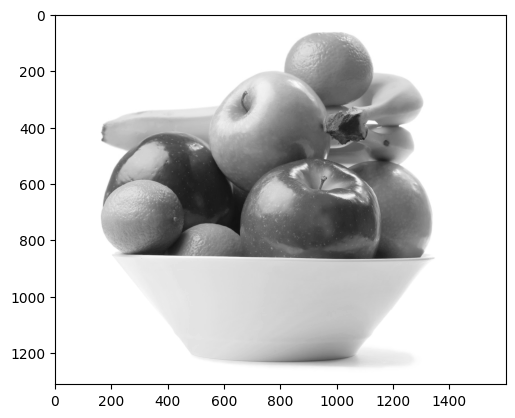

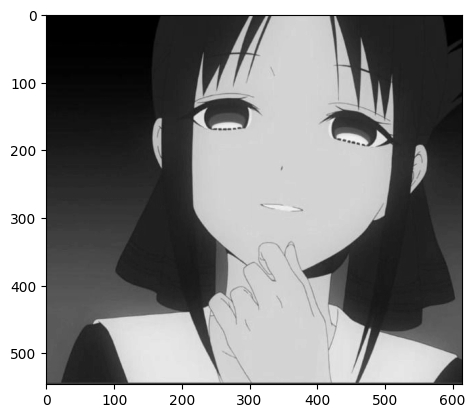

In [ ]:
image_np1 = kornia.utils.tensor_to_image(image_gray1)
image_np1 = (image_np1 * 255.0).astype('uint8')
plt.imshow(image_np1, cmap = 'gray')
plt.show()

image_np2 = kornia.utils.tensor_to_image(image_gray2)
image_np2 = (image_np2 * 255.0).astype('uint8')
plt.imshow(image_np2, cmap = 'gray')
plt.show()


Call the actual function for Q1 Part 1 on both images

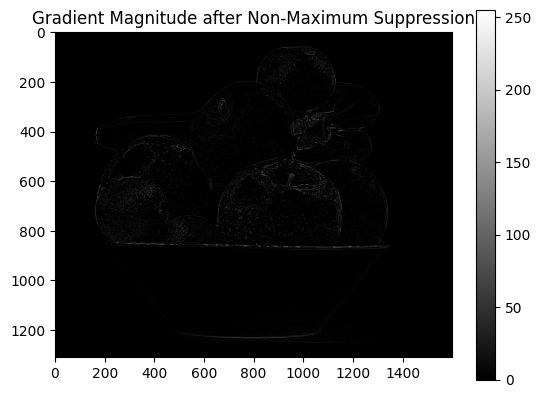

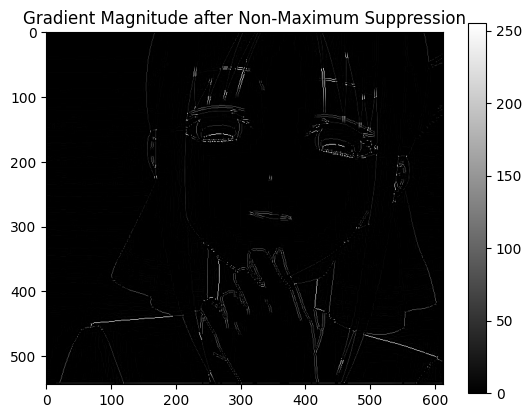

In [ ]:
image1 = MyCanny(image_gray1, 5, 1.5)
#print(image1.shape)
image1 = kornia.utils.tensor_to_image(image1)
image1 = (image1 * 255.0).astype('uint8')
plt.imshow(image1, cmap='gray')
plt.title('Gradient Magnitude after Non-Maximum Suppression')
plt.colorbar()
plt.show()

image2 = MyCanny(image_gray2, 5, 1.5)
#print(image2.shape)
image2 = kornia.utils.tensor_to_image(image2)
image2 = (image2 * 255.0).astype('uint8')
plt.imshow(image2, cmap='gray')
plt.title('Gradient Magnitude after Non-Maximum Suppression')
plt.colorbar()
plt.show()

Initialize the function for Q1 Part 2

In [ ]:
def MyCannyFull(bw_image, standard_deviation, gradient_magnitude_threshold, high_threshold, low_threshold):

  #Apply a Gaussian blur to the image
  gaussian_blurred_image = kornia.filters.gaussian_blur2d(bw_image, (3, 3), (standard_deviation, standard_deviation))

  #Get the Sobel filter vectors for the X and Y planes
  sobel_x = torch.FloatTensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]]).unsqueeze(0).unsqueeze(0)
  sobel_y = torch.FloatTensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]).unsqueeze(0).unsqueeze(0)

  #Calculate the derivatives of the filters across the X and Y planes
  gradient_x = torch.nn.functional.conv2d(gaussian_blurred_image, sobel_x)
  gradient_y = torch.nn.functional.conv2d(gaussian_blurred_image, sobel_y)

  #Calculate the magnitude and direction of the gradients
  gradient_magnitude = torch.sqrt(torch.pow(gradient_x, 2) + torch.pow(gradient_y, 2))
  gradient_magnitude[gradient_magnitude > gradient_magnitude_threshold] = 0
  gradient_direction = torch.atan2(gradient_y, gradient_x)

  #Apply non-maximum suppression to the gradients
  B, C, H, W = gradient_magnitude.shape
  #print(B,C,H,W)
  non_max_tensor = torch.zeros((B, C, H, W))
  #print(non_max_tensor)
  radian_angle = gradient_direction * 180. / np.pi
  radian_angle[radian_angle < 0] += 180
  #print(radian_angle)
  for i in range(1, H - 1):
    for j in range(1, W - 1):
      if (0 <= radian_angle[0, 0, i, j] < 22.5):
        coord1 = gradient_magnitude[0, 0, i, j+1]
        coord2 = gradient_magnitude[0, 0, i, j-1]
      elif (22.5 <= radian_angle[0, 0, i, j] < 67.5):
        coord1 = gradient_magnitude[0, 0, i+1, j-1]
        coord2 = gradient_magnitude[0, 0, i-1, j+1]
      elif (67.5 <= radian_angle[0, 0, i, j] < 112.5):
        coord1 = gradient_magnitude[0, 0, i+1, j]
        coord2 = gradient_magnitude[0, 0, i-1, j]
      elif (112.5 <= radian_angle[0, 0, i, j] < 157.5):
        coord1 = gradient_magnitude[0, 0, i-1, j-1]
        coord2 = gradient_magnitude[0, 0, i+1, j+1]
      elif (157.5 <= radian_angle[0, 0, i, j] <= 180):
        coord1 = gradient_magnitude[0, 0, i, j+1]
        coord2 = gradient_magnitude[0, 0, i, j-1]

      if (gradient_magnitude[0, 0, i, j] >= coord1) and (gradient_magnitude[0, 0, i, j] >= coord2):
          non_max_tensor[0, 0, i, j] = gradient_magnitude[0, 0, i, j]
      else:
          non_max_tensor[0, 0, i, j] = 0


  #Initialize a boolean tensor to store discovered edges
  discovered_edges = torch.zeros((B, C, H, W)).bool()

  #Initialize an empty list of pixels to be processes
  pixel_list = []

  #Iterate through non_max_tensor and mark edges higher than the threshold to store in both lists
  for i in range(H):
    for j in range(W):
      if (non_max_tensor[0, 0, i, j] > high_threshold):
        pixel_list.append((i, j))
        discovered_edges[0, 0, i, j] = True

  #BFS loop
  while len(pixel_list) > 0:
    i, j = pixel_list.pop(0)
    for x in range(-1, 2):
      for y in range(-1, 2):
        new_i, new_j = i + x, j + y
        if ((0 <= new_i < H) and (0 <= new_j < W) and (discovered_edges[0, 0, new_i, new_j] == False) and (non_max_tensor[0, 0, new_i, new_j] > low_threshold)):
            pixel_list.append((new_i, new_j))
            discovered_edges[0, 0, new_i, new_j] = True

  return discovered_edges

Call the actual function for Q1 Part 2 on both images

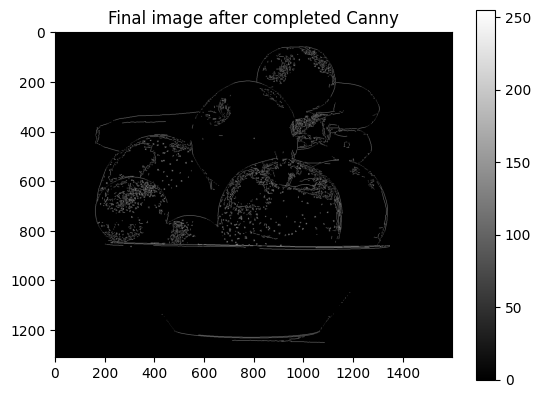

In [ ]:
image1 = MyCannyFull(image_gray1, 5, 1.5, 0.2, 0.1)
image1 = kornia.utils.tensor_to_image(image1)
image1 = (image1 * 255.0).astype('uint8')
plt.imshow(image1, cmap='gray')
plt.title('Final image after completed Canny')
plt.colorbar()
plt.show()

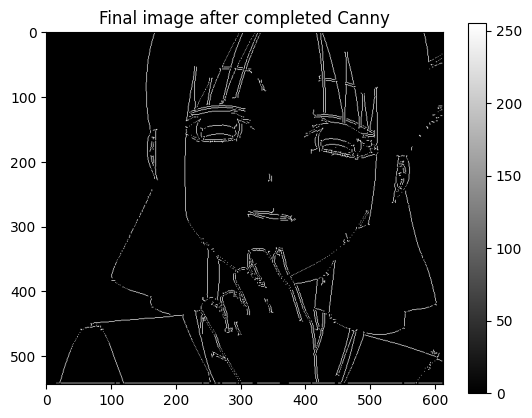

In [ ]:
image2 = MyCannyFull(image_gray2, 5, 1.5, 0.085, 0.003)
image2 = kornia.utils.tensor_to_image(image2)
image2 = (image2 * 255.0).astype('uint8')
plt.imshow(image2, cmap='gray')
plt.title('Final image after completed Canny')
plt.colorbar()
plt.show()

Initialize the function(s) for Q2

In [ ]:
def MySeamCarving(img, X, Y):
  #Calculate the Energy Matrix
  gradient = kornia.filters.SpatialGradient(mode='sobel')(img)
  Gx = gradient[:, :, 0, :, :]
  Gy = gradient[:, :, 1, :, :]
  gradient_magnitude = torch.sqrt(torch.pow(Gx, 2) + torch.pow(Gy, 2))
  energy_image = torch.sum(gradient_magnitude, dim=1)  # Sum over the color channels

  #Create a scoring matrix with spatial image dimensions matching those of the input image
  scoring_matrix = torch.zeros_like(energy_image)

  #Set the first row of the new one as equal to the first row of the original one
  scoring_matrix[:, 0, :] = energy_image[:, 0, :]
  #print("Original Tensor First Row:", energy_image[0, 0, :10])  # Print first 10 values of the original tensor's first row
  #print("Copied Tensor First Row:", scoring_matrix[0, 0, :10])  # Print first 10 values of the copied tensor's first row

  B, H, W = energy_image.shape
  #print(B,H,W)
  for b in range(B):
    for i in range(1, H):
      for j in range(1, W):
        scoring_matrix[b, i, j] = energy_image[b, i, j]


  return scoring_matrix

Call the actual function for Q2 on both images

In [ ]:
#Read in york image
york_img_read = plt.imread("bowl-of-fruit.jpg")
york_img_read_float = york_img_read.astype("float32") / 255.0
york_img_torch = kornia.utils.image_to_tensor(york_img_read_float, keepdim=False)
york_img_gray = kornia.color.rgb_to_grayscale(york_img_torch)
york_img_gaussian = kornia.filters.gaussian_blur2d(york_img_gray, (3, 3), (3, 3))
#print(york_img_gaussian.shape)

#Read in personal image
personal_img_read = plt.imread("face-test.jpg")
personal_img_read_float = personal_img_read.astype("float32") / 255.0
personal_img_torch = kornia.utils.image_to_tensor(personal_img_read_float, keepdim=False)
personal_img_gray = kornia.color.rgb_to_grayscale(personal_img_torch)
personal_img_gaussian = kornia.filters.gaussian_blur2d(personal_img_gray, (3, 3), (3, 3))
#print(personal_img_gaussian.shape)

In [ ]:
x = MySeamCarving(york_img_gaussian, 0.5, 0.5)
print(type(x))
print(x.shape)

y = MySeamCarving(personal_img_gaussian, 0.5, 0.5)
print(type(y))
print(y.shape)

1 1312 1600
<class 'torch.Tensor'>
torch.Size([1, 1312, 1600])
1 546 615
<class 'torch.Tensor'>
torch.Size([1, 546, 615])


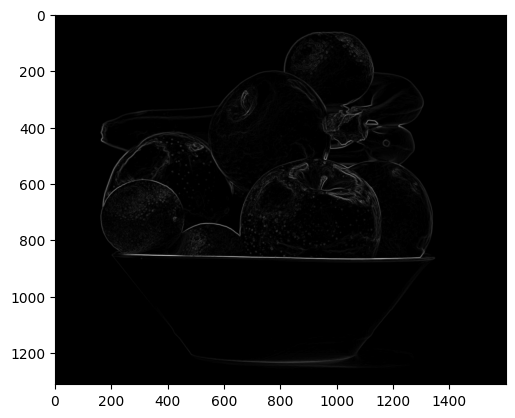

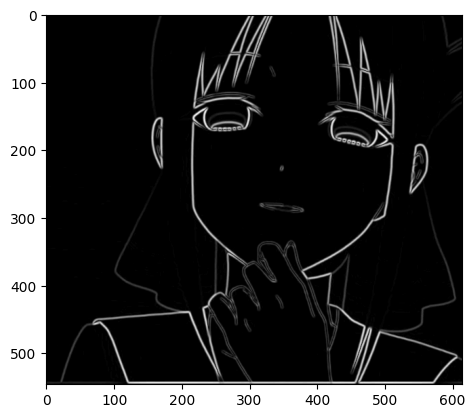

In [ ]:
image1 = kornia.utils.tensor_to_image(x)
image1 = (image1 * 255.0).astype('uint8')
plt.imshow(image1, cmap='gray')
plt.show()

image1 = kornia.utils.tensor_to_image(y)
image1 = (image1 * 255.0).astype('uint8')
plt.imshow(image1, cmap='gray')
plt.show()